# SEABORN

It is the statistical plotting library built on top of matplotlib

In [69]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Distribution plots

In [5]:
df =  sns.load_dataset('tips')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# To get distribution of single column of dataframe

Histogram : x_axis denotes the column, y_axis denotes the count

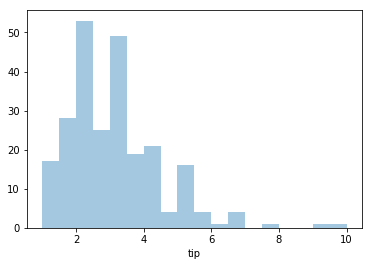

In [9]:
sns.distplot(df['tip'], kde=False)

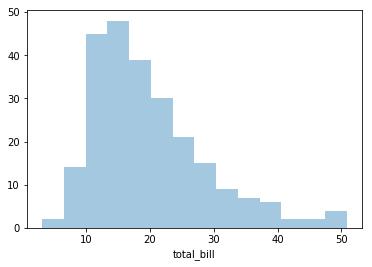

In [10]:
sns.distplot(df['total_bill'], kde=False)

To get more information, we can add increase number of bins

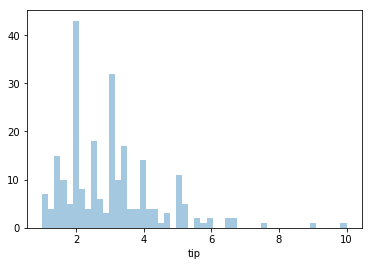

In [12]:
sns.distplot(df['tip'], kde=False, bins=50)

# combined distribution - jointplot

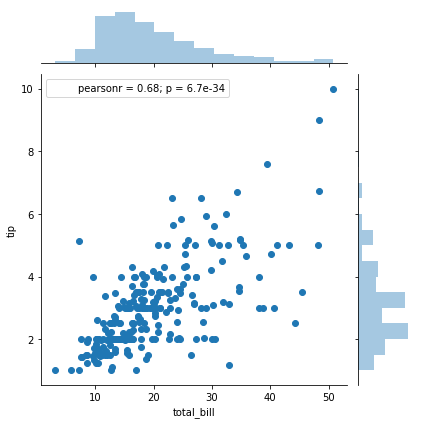

In [13]:
sns.jointplot(x='total_bill',y='tip',data=df)

 It consists of two distribution plots and one combined scatter plot in between

To change the appearance of the points in the plot between kind parameter can be used

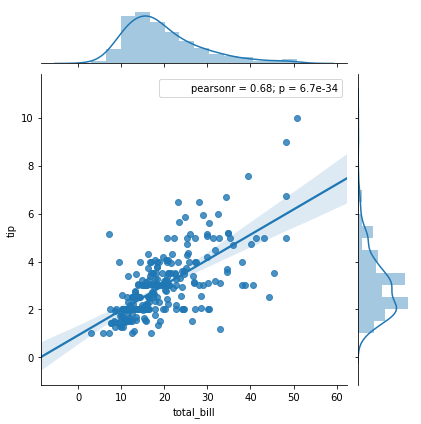

In [15]:
sns.jointplot(x='total_bill',y='tip',data=df, kind='reg')

Seaborn draws linear regression line - the line which best fits data points with minimum error

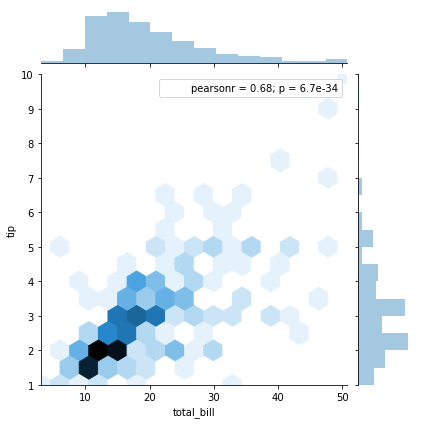

In [17]:
sns.jointplot(x='total_bill',y='tip',data=df, kind='hex')

This is hexagon representation of the data distribution. Dark colored hexagon indicates that many data points are clustered at that point. 

# pairplot

This will give an overview of how each numerical column is related to the other. Pairwise comparison between numerical columns

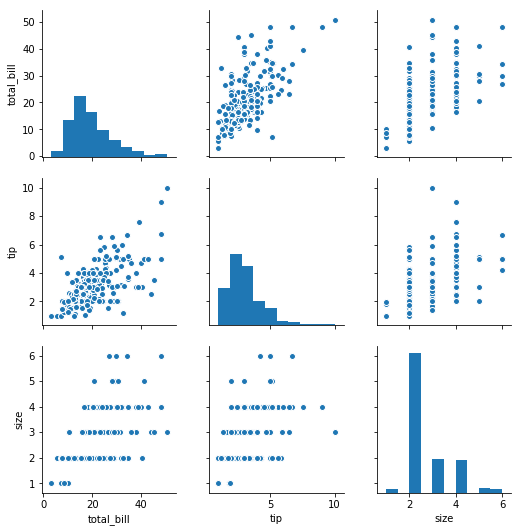

In [19]:
#Pass the df
sns.pairplot(df)

Categorical data view
Hue command can be used for viewing categorical data. It is give distribution with respect to the variable in different colors

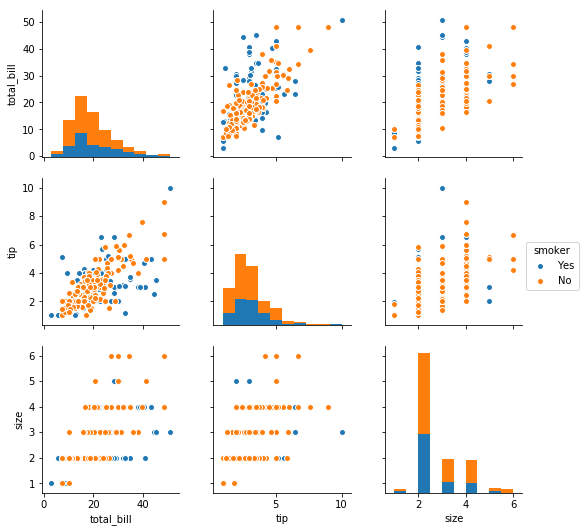

In [21]:
sns.pairplot(df, hue='smoker')

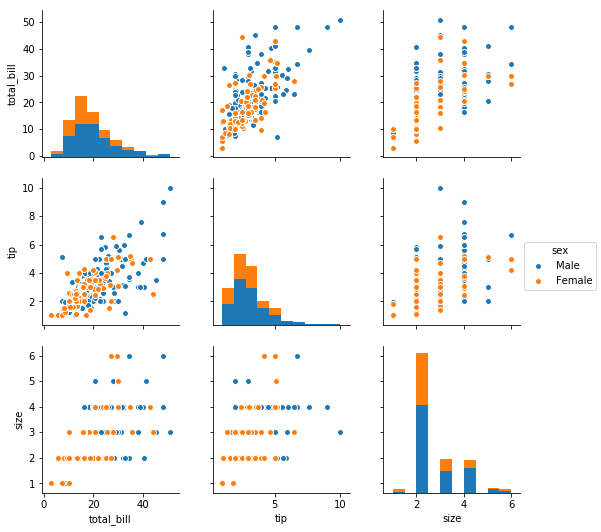

In [23]:
sns.pairplot(df, hue='sex')

# Kernel Density Estimation Plot

Reference: https://en.wikipedia.org/wiki/Kernel_density_estimation

This is basically the summation of all normal distributions of a particular point. Summation of all normal distributions will give that curve drawn over the histogram

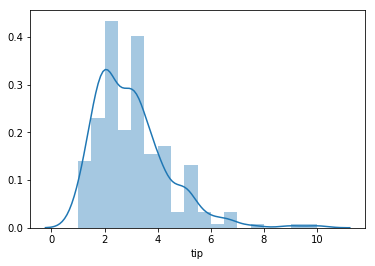

In [30]:
sns.distplot(df['tip'])

# Rugplot 

It plots every data into the graph unlike histograms which will plot data in bins

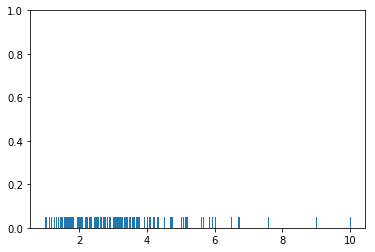

In [31]:
sns.rugplot(df['tip'])

# Handling categorial data

# Barplot

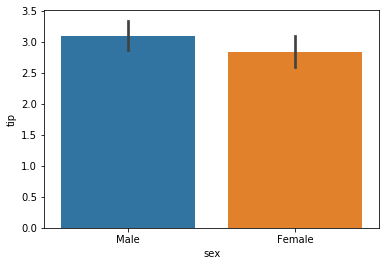

In [33]:
sns.barplot(x='sex', y='tip', data=df)

This basically gives information aboutthe average tips given by male and female

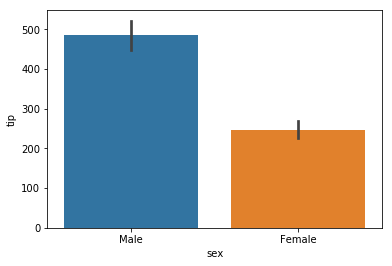

In [36]:
#By default it gives average. To change that 'estimator' command can be used.
#Gives information about total tips given by male and female
sns.barplot(x='sex', y='tip', data=df, estimator=np.sum)

# Countplot

To get number of data points falling under particular category

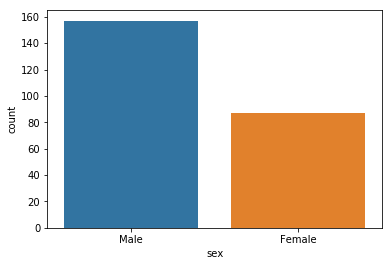

In [38]:
sns.countplot(x='sex', data=df)

# Boxplot

Data is first sorted and grouped into four. 25% of all is placed in each group. Lines dividing these 25% is called as quartile. In total, there will be 4 quartiles. 
- The line that divides the box is called as median. Median means half of the scores are lesser, equal or greater than this value.
- Middle box represents middle 50% of data in the group. This is called as inter-quartile range.
- 75% of the scores fall below the upper quartile
- 25% of the scores fall below the lower quartile
- Upper and lower whiskers represent data outside middle 50%
- Outliers are represented outside the box plot as points

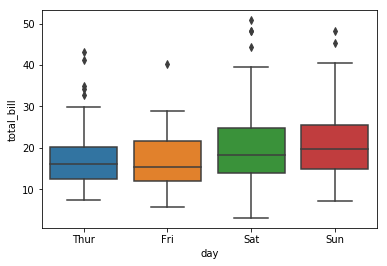

In [40]:
#This gives the distribution of total_bill across the days
sns.boxplot(x='day', y='total_bill', data=df)

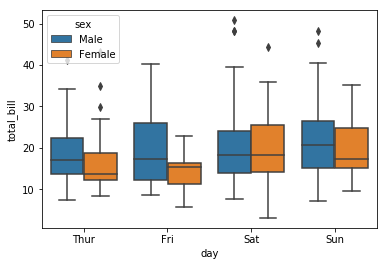

In [41]:
#To get even more deeper plot. we can use categorical data 
sns.boxplot(x='day', y='total_bill', data=df, hue='sex')

# Strip plot

This is similar to scatter plot but it is based on some category

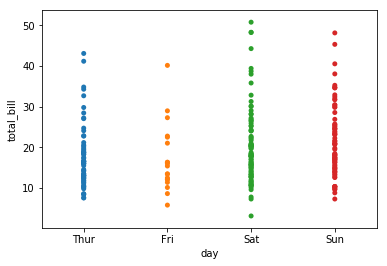

In [43]:
sns.stripplot(x='day', y='total_bill', data=df)

To seperate stacked points for the sake of better visualization 'jitter' command is used

C:\Users\saish\Anaconda2\envs\dd\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


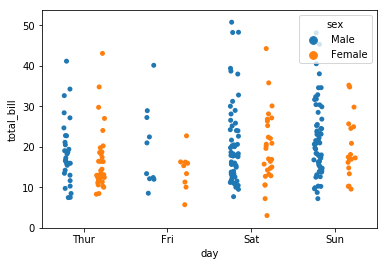

In [46]:
sns.stripplot(x='day', y='total_bill', data=df, jitter=True, hue='sex', split=True)

#  Violin and Swarm plot combined

Below is the combination of violin and swarm plot. This gives a better view of 'KDE' 

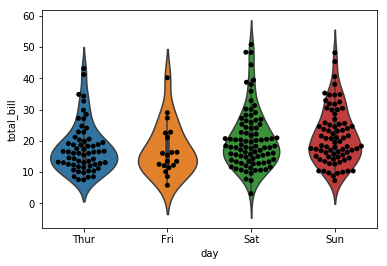

In [48]:
sns.violinplot(x='day', y='total_bill', data=df)
sns.swarmplot(x='day', y='total_bill', data=df, color='black')

# Matrix Plots 

In [49]:
df1 = sns.load_dataset('flights')

In [50]:
df1.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Matrix form of data needs to be created for matrix plots

In [52]:
data = df.corr()

# HeatMap

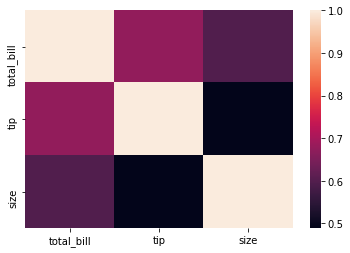

In [53]:
sns.heatmap(data)

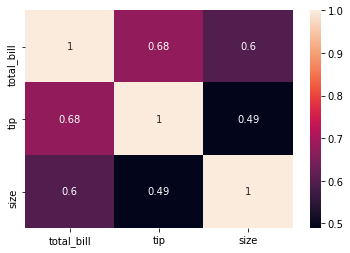

In [54]:
#To add numerical value
sns.heatmap(data, annot=True)

In [58]:
#Creating matrix table for flight data
new_df1 = df1.pivot_table(index='month', columns='year', values='passengers')

In [59]:
new_df1

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


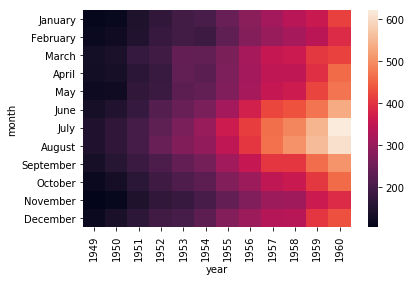

In [61]:
sns.heatmap(new_df1)

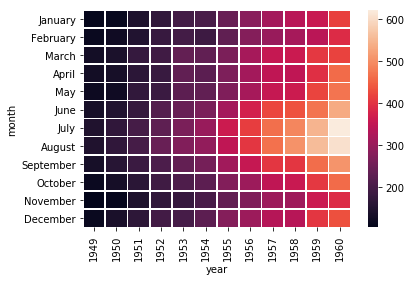

In [62]:
sns.heatmap(new_df1, linewidth='0.6', linecolor='white')

# clustermap

Cluster information to show columns and rows that are similar to each other

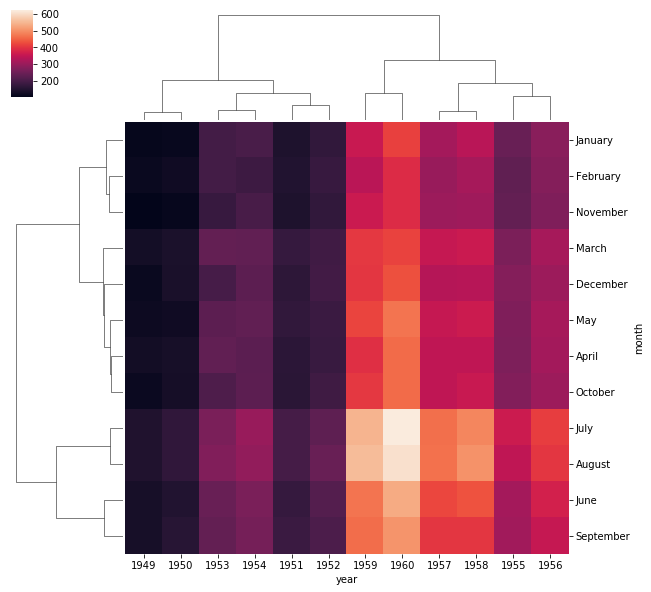

In [63]:
sns.clustermap(new_df1)

To normalize data. The scale will range from 0 to 1

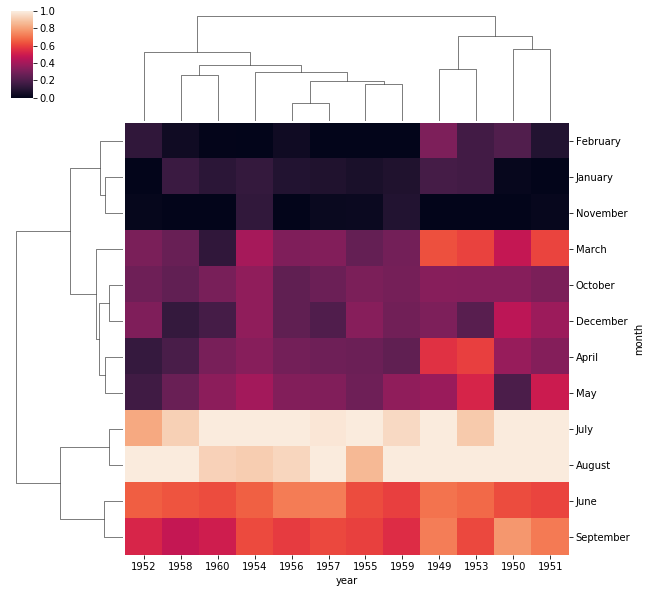

In [65]:
sns.clustermap(new_df1, standard_scale=1)

# Grids

In [66]:
df2 = sns.load_dataset('iris')

Grid plot gives more control over how we want to visualize the data

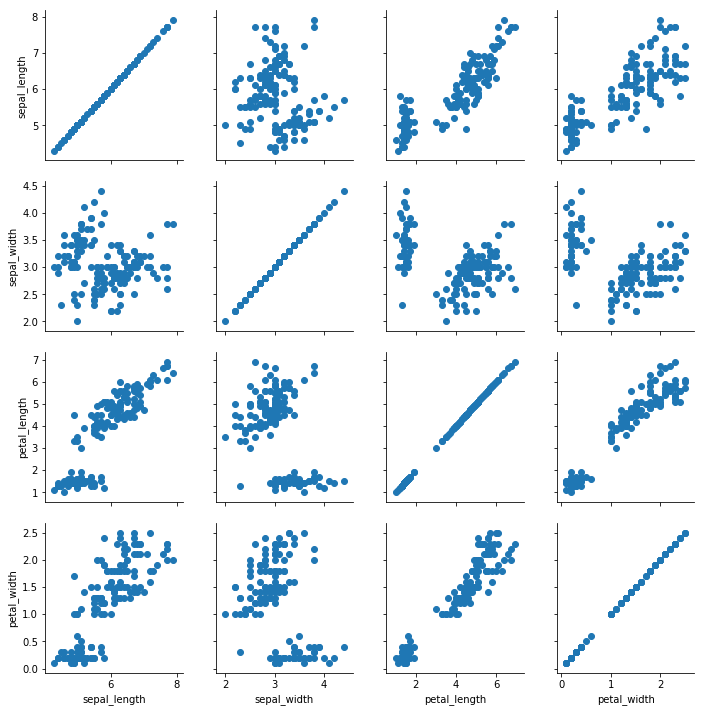

In [70]:
#This will give us an empty grid above which we can apply any types of plot
grid = sns.PairGrid(df2)
#scatter plot over grid
grid.map(plt.scatter)

Creating combination of plots

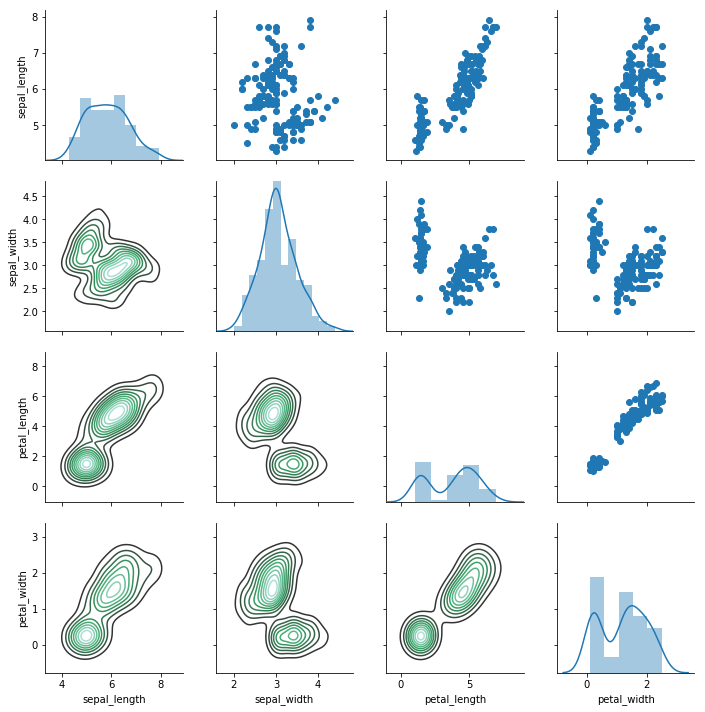

In [71]:
#This will give us an empty grid above which we can apply any types of plot
grid = sns.PairGrid(df2)
#scatter plot over grid
grid.map_diag(sns.distplot)
grid.map_upper(plt.scatter)
grid.map_lower(sns.kdeplot)

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Facet Grid

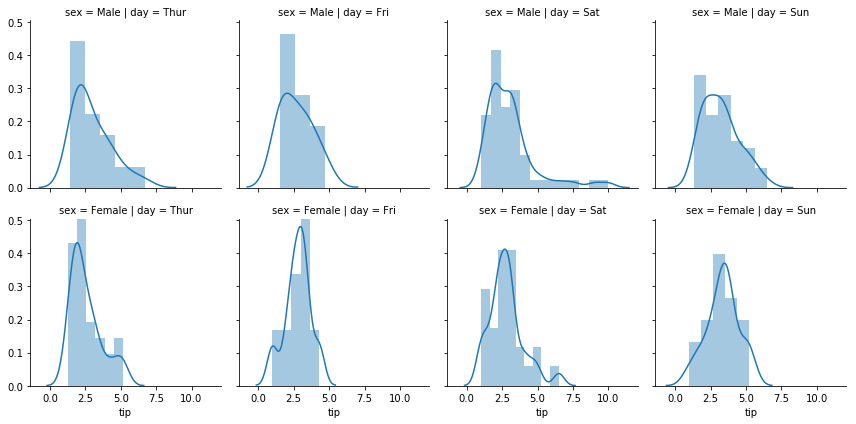

In [74]:
#This gives the distribution of tip over sex and day
gr = sns.FacetGrid(data=df, row='sex', col='day')
gr.map(sns.distplot, 'tip')

# Regression Plot

Simple linear model plot. This plot the regression line between the dependant and an independant variable

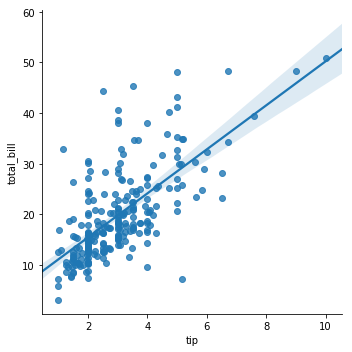

In [75]:
sns.lmplot(x='tip', y='total_bill', data=df)

To give more deeper analysis

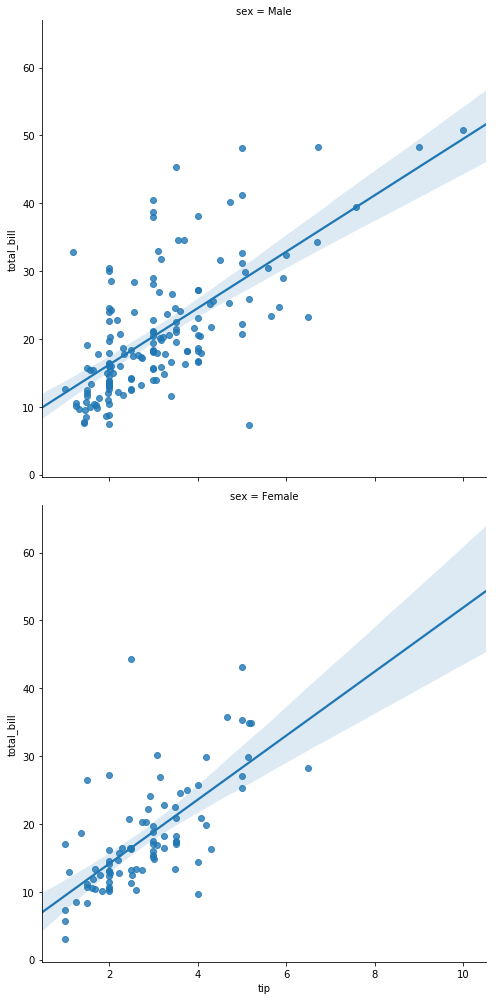

In [83]:
sns.lmplot(x='tip', y='total_bill', data=df, row='sex', aspect=1, size=7)